In [ ]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [40]:
library(tidyverse)

# Lecture 03: Coding standards and data transformation

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Wrap up a few aspects of plotting:
    * [Facets](#Facets)
    * [Labels and titles](#Labels-and-titles)
* Learn about [coding standards](#Coding-standards): how to write maintainable code!
* Learn [how to manipulate data](#Data-manipulation), including:
    * [Filtering data](#Filtering-data)
    * [Arranging (sorting) rows](#Arranging-rows)
    * [Selecting columns](#Selecting-columns)
</div>




# Facets
We already saw how to add a third variable to a scatter plot by using a color aesthetics. **Facets** provide another way to add a third variable.

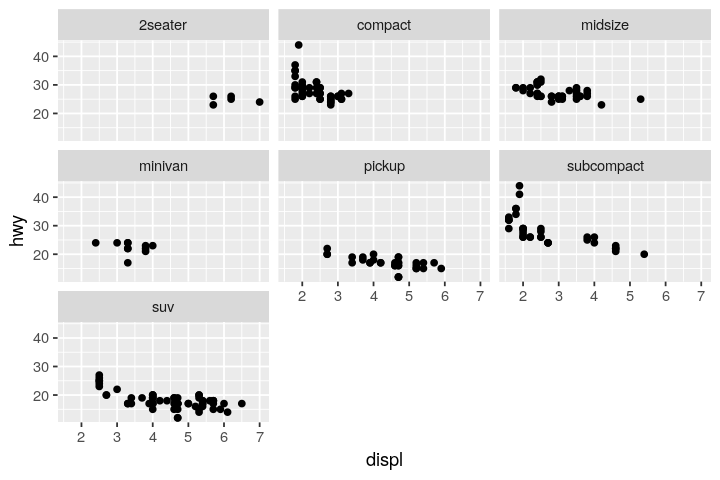

In [28]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class) # The ~ operator creates an R formula

The ``facet_wrap()`` command here told ggplot to generate a separate plot for each level of the discrete variable **class**. It also went ahead and arranged them into a nice 3x3 grid format.

The syntax to facet may look a little funny: 
```{r}
facet_wrap(~ class)
```
The tilde (``~``) at the beginning denotes what is called a **formula** in R. We will discuss formulas later in the class when we talk about modeling. For now, just keep in mind that the facet command must be written just so for things to work:

You should facet on a discrete variable. If you facet on a continuous variable, e.g., **cty**, R will discretize it first.

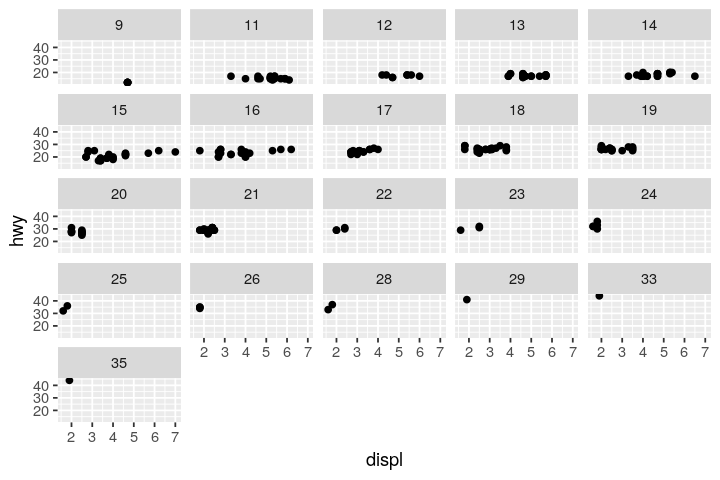

In [29]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ cty) 

### Exercise 
You can facet on a combination of variables by modifying the formula to include more variables.
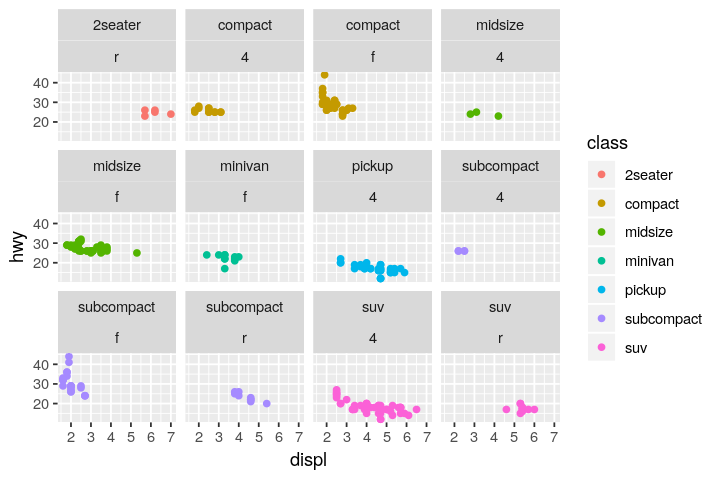

## Labels and titles
Adding labels and titles is extremely important when publishing plots. An uninterpretable plot is worse than no plot at all!
![bad plot](https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/mykland_fig1.jpg)
<caption> (Actual plot from a paper in a respected statistics journal.)</caption>
<small>Source: <a href="https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/">https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/</a></small>

("Exercise": reproduce this plot. For fun on your own time.)

### Exercise
Add appropriate axis and title labels to the diamond cuts plot. (*Hint*: `??ggplot2::title` if you don't know the commands to do this.)
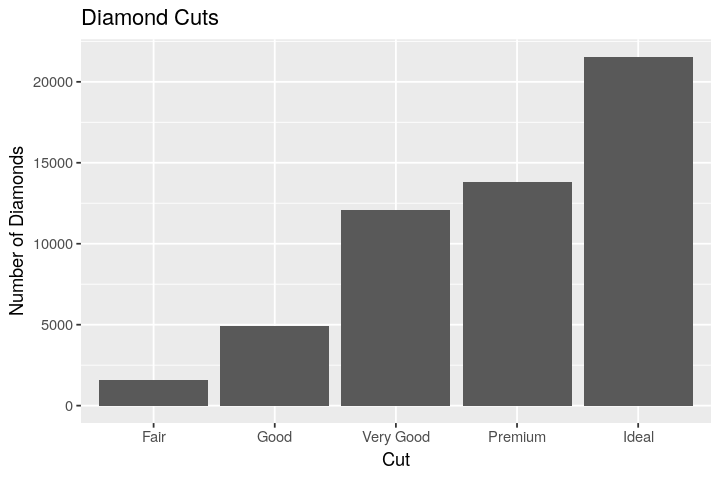

## Coding standards
Now that you've had a chance to write some R code, let's circle back and think about some aspects of writing *clean and legible* R code.

### Variables
Variables in R must start with a letter, and can contain letters, numbers and some punctuation:
```{r}
> variable = 1
> AnotherVariable <- 2
> variable3 = 3
> fourth.variable <- 4
> 1nvalid_variable = 5
Error: unexpected symbol in "1nvalid_variable"
```
Notice that we mixed two assignment operators: `=` and `<-`. They are equivalent. The arrow notation is peculiar to R. Choosing which one to use is a matter of personal preference.

### Naming
There are variable styles for naming variables in R. The authors and I prefer "snake case", which means all lower case with underscores substituted for spaces:
```{r}
i_use_snake_case
otherPeopleUseCamelCase
some.people.use.periods
And_aFew.People_RENOUNCEconvention
```
This is again a matter of personal preference. The period notation is again peculiar to R, since most other languages do not let you have periods in variable names (they reserve that for OOP method calls.) The most important thing is that you be consistent.

### Calling functions
As you saw with `ggplot`, there are several ways to pass function parameters in R. The first and most common way is to rely on the default ordering of the function:
- if you do not pass parameter names, then R will assume that you have given the parameters in the order in which they appear in the function definition.
- if you pass parameter names, then R will do what you expect.

It's also possible to mix named and un-named parameters, although this is usually not advisable as it's easy to make mistakes.

In [2]:
f = function(a, b) a^b


f(2, 3)      # computes 2^3 = 8
f(a=2, b=3)  # same
f(b=3, a=2)  # same


f(3, 2)      # not same: computes 3^2 = 9



f(3, b=2)    # same


f(3, a=3)    # tricky

[1] 8

[1] 8

[1] 8

[1] 9

[1] 9

[1] 27

### Exercise

What does `f(3, a=3, a=4)` return?

1. 8
2. 9
3. 27
4. An error

In [43]:
f(3, a=3, a=4)

ERROR: Error in f(3, a = 3, a = 4): formal argument "a" matched by multiple actual arguments


## Data manipulation
Manipulating data is an important part of data science, and there are a lot of built-in commands for doing it in R:
```{r}
# Traditional data manipulation commands in R
subset()
aggregate()
merge()
reshape()
```
These commands are old and somewhat difficult to use. Instead of the traditional commands, we are going to focus on the `dplyr` package for filtering data. They provide a nice suite of replacements for the traditional commands, which have a consistent, unified interface and interoperate nicely with each other.

In [4]:
library(nycflights13)
print(flights)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 336,766 more row

### Filtering data
The first operation we'll learn about is filtering. Filtering is interpereted to mean "keep only the rows which match these criteria". The syntax for the `filter` command is 
```{r}
filter(<TIBBLE>, <LOGICAL CRITERIA>)
```
This commands returns a new tibble whose rows all match the specified criteria.

#### Types of logical criteria
For those who are new to programming, we now briefly review the sorts of logical operations that you can specify for commands like `filter()`. The basic logical operators in R are `>`, `>=`, `<`, `<=`, `!=` (not equal), and `==` (equal). The first four are used for comparing numbers and function exactly as in mathematics:
```{r}
> 1 > 1
[1] FALSE
> 1 >= 1
[1] TRUE
> 2.5 < 3
[1] TRUE
> 2.5 <= 3
[1] TRUE
```

The operators `=` and `!=` test for equality. This can be a bit more subtle:
```{r}
> 1 == "1"
[1] TRUE
> 1 == 1.0
[1] TRUE
> "1.0" == "1"
[1] FALSE
```
The first test succeeds because R converts the integer `1` to a string in order to test for equality with the string `"1"`. The second succeeds because R converts the integer `1` to a numeric (float) in order to test for equality with the numeric `1.0`. The third test fails because `"1.0"` and `"1"` are different when considered as strings.

#### Assignment vs. equality
An extremely common mistake for beginner programmers is to confuse `=` and `==` when writing code. As we have seen,
- `=` is used for
    - assigning a value to a variable, and
    - passing a named parameter into a function. 
- `==` is used for testing equality. 

The following statements illustrate the differences:


```{r}
> a = 2  # assigns the integer 1 to a
> b = 1  # assigns the integer 2 to b
> a == 1 # tests that a equals 1
[1] TRUE
> b == 1 # tests that b equals 1
[1] FALSE
> f(a=2, b=1)  # calls the function f with named arguments
[1] 2
> f(a==2, b==1) # same as f(TRUE, TRUE)
[1] 1
```
Can you explain the return value in the last line?


#### Boolean operations
Logical expressions are combined using *boolean operations*. The basic boolean operations are `and`, `or`, and `not`, denoted `&`, `|` and `!` respectively.


In [5]:
TRUE & FALSE

[1] FALSE

In [6]:
FALSE | TRUE

[1] TRUE

In [7]:
! TRUE

[1] FALSE

There are also doubled versions of `&` and `|` denoted `&&` and `||`. Do not use them here. We will return to these later in the course.

Two other less common logical operators are `xor` and `%in%`:
* `xor(x, y)` `TRUE` iff exactly one of x and y is `TRUE`
* `x %in% y`:

In [8]:
xor(TRUE, TRUE)

[1] FALSE

In [9]:
xor(TRUE, FALSE)

[1] TRUE

In [10]:
 1 %in% c(1,2,3)

[1] TRUE

### Missing data
Something you will often encounter when working with real data are missing observations. R has a special value, `NA` , for representing missing data. You can think of the value of `NA` as "I don't know". Thus, logical and mathematical operations involving `NA` will again return `NA`, so that `NA`s "propagate through" the computation:

In [44]:
NA + 5  # 5 + I-don't-know = I-don't-know

[1] NA

In [12]:
1 < NA  # Is 1 less that I-don't-know? I don't know.

[1] NA

In [45]:
NA < NA  # Is I-don't-know greater than I-don't-know? I don't know.
mean(c(1, NA, 2), na.rm=T)  # And so forth.

[1] NA

[1] 1.5

In [47]:
NA == NA

[1] NA

Since you cannot test `NA`s for equality, R has a special function for determining whether a value is `NA`:

In [15]:
is.na(NA)
is.na(1)

[1] TRUE

[1] FALSE

### Examples of filtering
Let's use what we have just learned to evaluate some simple queries on the `flights` dataset. Let's first construct narrow down to all flights that departed on December 31:

In [50]:
print(filter(flights, month == 12 & day == 31 & minute == 12)) # all flights that departed on December 31

# A tibble: 5 x 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013    12    31      813            812         1     1101           1111
2  2013    12    31      905            912        -7     1055           1120
3  2013    12    31     1105           1012        53     1211           1135
4  2013    12    31     1121           1112         9     1418           1400
5  2013    12    31     1311           1312        -1     1625           1606
# ... with 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>


In [17]:
print(filter(flights, month == 12, day == 31)) # multiple arguments are equivalent to `&`

# A tibble: 776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12    31       13           2359        14      439            437
 2  2013    12    31       18           2359        19      449            444
 3  2013    12    31       26           2245       101      129           2353
 4  2013    12    31      459            500        -1      655            651
 5  2013    12    31      514            515        -1      814            812
 6  2013    12    31      549            551        -2      925            900
 7  2013    12    31      550            600       -10      725            745
 8  2013    12    31      552            600        -8      811            826
 9  2013    12    31      553            600        -7      741            754
10  2013    12    31      554            550         4     1024           1027
# ... with 766 more rows, and 1

Let's filter down to all flights which were in the last quarter of the year (October through December). That is, we want flights whose `month` is 10, 11, or 12. To do this we will make use of the `%in%` operator as well as the `:` (colon) operator. The colon operator takes two integers and returns a vector of all the integers between them: `a:b = c(a,a+1,...,b-1,b)`.

In [57]:
# last_quarter = 10:12
nrow(filter(flights, month == 10 | month == 11 | month == 12))

[1] 84292

### Counting matches
Sometimes we just want to know how many observations match a given filter. The `nrow()` command can be used to count the number of rows in a data table.

In [59]:
nrow(filter(flights, !is.na(dep_time))) #  counting flights with missing departure time.

[1] 328521

In [60]:
nrow(filter(flights, between(month, 10, 12))) # no. of flights departing between Jan and Mar

[1] 84292

### Exercise

<table class="table-condensed">
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr><td>How many flights were there in 
        months beginning with the letter <code>J</code>?</td>
        <td>How many flights departed on a Monday?</td>
    </tr>
<tr><td>

1. 27,004
2. 57,668
3. 84,672
4. 93,101

</td><td>

1. 46,537
2. 51,812
3. 80,100
4. 101,991

</td>
    </tr></table>

In [9]:
# Your code here

### Exercise

<table class="table-condensed">
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr><td>
What proportion of the flights have a missing departure time?
        </td>
        <td>
Of all the flights that departed in the first week of January, how many have a missing departure time?
        </td>
    </tr>
<tr><td>

1. 0.003
2. 0.025
3. 0.081
4. 0.105


</td><td>

1. None
2. 35
3. 101
4. 6,064

</td>
    </tr></table>
    
    


In [13]:
# Your code here

## Arranging rows
`arrange` can order rows of a data frame using a variable name (or a more complicated expression). If you provide multiple expressions to order by, it uses the second one to break ties in the first one, third one to break ties in the second one, and so on.

In [14]:
print(arrange(flights, dep_time, arr_time))  # sorts by departure time, then arrival time

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     6    24        1           1950       251      105           2130
 2  2013     4    10        1           1930       271      106           2101
 3  2013     1    13        1           2249        72      108           2357
 4  2013     2    11        1           2100       181      111           2225
 5  2013     3    19        1           2250        71      120              5
 6  2013     2    24        1           2245        76      121           2354
 7  2013     1    31        1           2100       181      124           2225
 8  2013     7    22        1           2305        56      135             13
 9  2013     5    22        1           1935       266      154           2140
10  2013     7     1        1           2029       212      236           2359
# ... with 336,766 more row

Note the difference between this table and 

In [15]:
print(arrange(flights, arr_time, dep_time))  # sorts by arrival time, then departure time

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12     8     1909           1804        65        1           2125
 2  2013    11    15     1929           1932        -3        1             28
 3  2013    12    14     1944           1815        89        1           2058
 4  2013    12     8     1957           1930        27        1           2301
 5  2013     7    28     2007           1940        27        1           2255
 6  2013     6    26     2008           1819       109        1           2118
 7  2013     5    22     2013           2020        -7        1           2245
 8  2013     1    16     2018           2025        -7        1           2329
 9  2013     6    24     2018           1711       187        1           2039
10  2013     7    12     2020           2007        13        1           2359
# ... with 336,766 more row

In the first we sorted by departure time then arrival time. So the top-most rows have the earliest departure times. In the second we sorted by arrival time, so the top-most rows have the earliest arrival times.

The default order is *ascending*. `desc()` will order in descending order.

In [74]:
print(arrange(flights, -month))
 

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12     1       13           2359        14      446            445
 2  2013    12     1       17           2359        18      443            437
 3  2013    12     1      453            500        -7      636            651
 4  2013    12     1      520            515         5      749            808
 5  2013    12     1      536            540        -4      845            850
 6  2013    12     1      540            550       -10     1005           1027
 7  2013    12     1      541            545        -4      734            755
 8  2013    12     1      546            545         1      826            835
 9  2013    12     1      549            600       -11      648            659
10  2013    12     1      550            600       -10      825            854
# ... with 336,766 more row

You can mix ascending and descending order for different columns:

In [75]:
print(arrange(flights, desc(month), day))

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013    12     1       13           2359        14      446            445
 2  2013    12     1       17           2359        18      443            437
 3  2013    12     1      453            500        -7      636            651
 4  2013    12     1      520            515         5      749            808
 5  2013    12     1      536            540        -4      845            850
 6  2013    12     1      540            550       -10     1005           1027
 7  2013    12     1      541            545        -4      734            755
 8  2013    12     1      546            545         1      826            835
 9  2013    12     1      549            600       -11      648            659
10  2013    12     1      550            600       -10      825            854
# ... with 336,766 more row

Missing values are always left at the end by `arrange`, regardless of which order you sort:

In [79]:
head(arrange(flights, dep_delay))  # NA values of dep_delay will occur last
# print(tail(arrange(flights, desc(dep_delay))))

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 12     7  2040     2123           -43         40     2352          
2 2013  2     3  2022     2055           -33       2240     2338          
3 2013 11    10  1408     1440           -32       1549     1559          
4 2013  1    11  1900     1930           -30       2233     2243          
5 2013  1    29  1703     1730           -27       1947     1957          
6 2013  8     9   729      755           -26       1002      955          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1  48       B6        97   N592JB  JFK    DEN  265      1626     21   23    
2 -58       DL      1715   N612DL  LGA    MSY  162      1183     20   55    
3 -10       EV      5713   N825AS  LGA    IAD   52       229     14   40    
4 -10       DL      1435   N934DL  LGA    TPA  139      1010     19   30    
5 -10       F9       837   N208FR  LGA    DEN  250      1620     17   30    
6   7       M

### Exercise

<table class="table-condensed">
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr><td>
        What time did the first flight depart on the last day in February?
<td>
 
 Of all the flights that departed on or ahead of schedule in the first 15 days of any month, which one was in the air for the *second* shortest amount of time?

</td>
    </tr>
<tr><td>

1. 4:15am
2. 4:57am
3. 5:01am
4. 5:40am

</td><td>

1. EV 4118
2. HA 51
3. EV 4631
4. EV 4619

</td>
    </tr></table>


In [25]:
# Your code here

## Selecting columns
`select` is used to keep only a few variables of interest to the current analysis. It is most useful when working with data frames involving a large number of variables.

In [31]:
print(select(flights, year, month, day, dep_time, arr_time))

# A tibble: 336,776 x 5
    year month   day dep_time arr_time
   <int> <int> <int>    <int>    <int>
 1  2013     1     1      517      830
 2  2013     1     1      533      850
 3  2013     1     1      542      923
 4  2013     1     1      544     1004
 5  2013     1     1      554      812
 6  2013     1     1      554      740
 7  2013     1     1      555      913
 8  2013     1     1      557      709
 9  2013     1     1      557      838
10  2013     1     1      558      753
# ... with 336,766 more rows


You can change the name of the variables when selecting them.

In [32]:
print(select(flights, year, month, day, departure_time=dep_time, arrival_time=arr_time))

# A tibble: 336,776 x 5
    year month   day departure_time arrival_time
   <int> <int> <int>          <int>        <int>
 1  2013     1     1            517          830
 2  2013     1     1            533          850
 3  2013     1     1            542          923
 4  2013     1     1            544         1004
 5  2013     1     1            554          812
 6  2013     1     1            554          740
 7  2013     1     1            555          913
 8  2013     1     1            557          709
 9  2013     1     1            557          838
10  2013     1     1            558          753
# ... with 336,766 more rows


Note that `select` drops any variables not explicitly mentioned. To just rename some variables while keeping all others, use `rename`.

In [33]:
print(rename(flights, departure_time=dep_time, arrival_time=arr_time))

# A tibble: 336,776 x 19
    year month   day departure_time sched_dep_time dep_delay arrival_time
   <int> <int> <int>          <int>          <int>     <dbl>        <int>
 1  2013     1     1            517            515         2          830
 2  2013     1     1            533            529         4          850
 3  2013     1     1            542            540         2          923
 4  2013     1     1            544            545        -1         1004
 5  2013     1     1            554            600        -6          812
 6  2013     1     1            554            558        -4          740
 7  2013     1     1            555            600        -5          913
 8  2013     1     1            557            600        -3          709
 9  2013     1     1            557            600        -3          838
10  2013     1     1            558            600        -2          753
# ... with 336,766 more rows, and 12 more variables: sched_arr_time <int>,
#   arr_dela

If there are a lot of variables, you can save yourself some typing by using `:` and `-` in combination with select. The colon operator selects a range of variables:

In [100]:
print(flights)
select(flights, year:arr_time) %>% print

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 336,766 more row

The negative sign lets you select everything but certain columns:

In [104]:
print(select(flights, -(year:day)))

# A tibble: 336,776 x 16
   dep_time sched_dep_time dep_delay arr_time sched_arr_time arr_delay carrier
      <int>          <int>     <dbl>    <int>          <int>     <dbl> <chr>  
 1      517            515         2      830            819        11 UA     
 2      533            529         4      850            830        20 UA     
 3      542            540         2      923            850        33 AA     
 4      544            545        -1     1004           1022       -18 B6     
 5      554            600        -6      812            837       -25 DL     
 6      554            558        -4      740            728        12 UA     
 7      555            600        -5      913            854        19 B6     
 8      557            600        -3      709            723       -14 EV     
 9      557            600        -3      838            846        -8 B6     
10      558            600        -2      753            745         8 AA     
# ... with 336,766 more row

You can use `-` and `:` together, for example:

In [36]:
print(select(flights, -(year:month)))  # select everything EXCEPT the variables between year and month

# A tibble: 336,776 x 17
     day dep_time sched_dep_time dep_delay arr_time sched_arr_time arr_delay
   <int>    <int>          <int>     <dbl>    <int>          <int>     <dbl>
 1     1      517            515         2      830            819        11
 2     1      533            529         4      850            830        20
 3     1      542            540         2      923            850        33
 4     1      544            545        -1     1004           1022       -18
 5     1      554            600        -6      812            837       -25
 6     1      554            558        -4      740            728        12
 7     1      555            600        -5      913            854        19
 8     1      557            600        -3      709            723       -14
 9     1      557            600        -3      838            846        -8
10     1      558            600        -2      753            745         8
# ... with 336,766 more rows, and 10 more variables

If you want to bring a few variables at the beginning, you can use `everything()` to refer to the remaining variables.

In [108]:
select(flights, contains("time")) %>% ncol

[1] 6

In addition, there are some helper functions that only work inside `select()`.

* `starts_with()`, `ends_with()`, `contains()`
* `matches()`
* `num_range()`

These match *column names* (not variable values -- for that you'd use `filter()`).

You can consult the documentation or type `?select_helpers` at the prompt to learn more about these.

### Exercise

<table class="table-condensed">
    <tr><th>Beginner</th><th>Advanced</th></tr>
    <tr><td>
        How many columns in flights contain the word time?
<td>
    
How many column names in flights do *not* contain a vowel?

</td>
    </tr>
<tr><td>

1. 0
2. 2
3. 4
4. 6

</td><td>

1. 0
2. 1
3. 2
4. 3

</td>
    </tr></table>

In [41]:
# Your code here

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

### Regular expressions
Lastly we will look at an example of the `matches()` command, which allows us to match columns based on certain patterns known an *regular expressions*. Regular expressions are a very powerful matching language which we will study later in the course. Let's say I wanted to match all the columns that have the form:
```
<WORD>_<WORD>_<WORD>
```
That is, three words separated by two underscores.

In [41]:
select(flights, matches("\\w+_\\w+_\\w+")))  # regex to match WORD_WORD_WORD

# A tibble: 336,776 x 2
   sched_dep_time sched_arr_time
            <int>          <int>
 1            515            819
 2            529            830
 3            540            850
 4            545           1022
 5            600            837
 6            558            728
 7            600            854
 8            600            723
 9            600            846
10            600            745
# ... with 336,766 more rows
